In [7]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/philhoonoh/os/blob/main/lecture_summary/02_Chapter3_part1.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View Source</a>
  </td>
</table>

# Chapter 3
## Processes part1
#### Contents
    - 3.1 Process Concept
    - 3.2 Process Scheduling
    - 3.3 Operations on Processes
    - 3.4 Exercises
    - 3.5 Fork Function
    - 3.6 Online Quiz

### 3.1 Process Concept

### Process
- __process__ 란 __실행 중인 프로그램__ 으로서 OS에서의 작업 단위 입니다. 
- process 가 실행되기 위해서는 아래와 같은 resource 들이 필요합니다. 
    - CPU
    - Memory
    - files
    - I/O devices

### Process 의 Memory
- 프로세스의 __Memory__ 는 다음과 같이 나누어 집니다 
    - _CODE_ (TEXT) 
        - 실행되는 코드 
    - _DATA_ 
        - 전역변수 
    - _HEAP_ 
        - 프로그램이 실행될때 dynamic 하게 할당 되는 메모리
        - e.g.) C 에서 array의 길이가 프로그램이 실행됨에 따라 바뀌어야 되는 경우 malloc을 사용해서 heap 영역에 저장
    - _STACK_ 
        - 함수, 주소, 지역변수

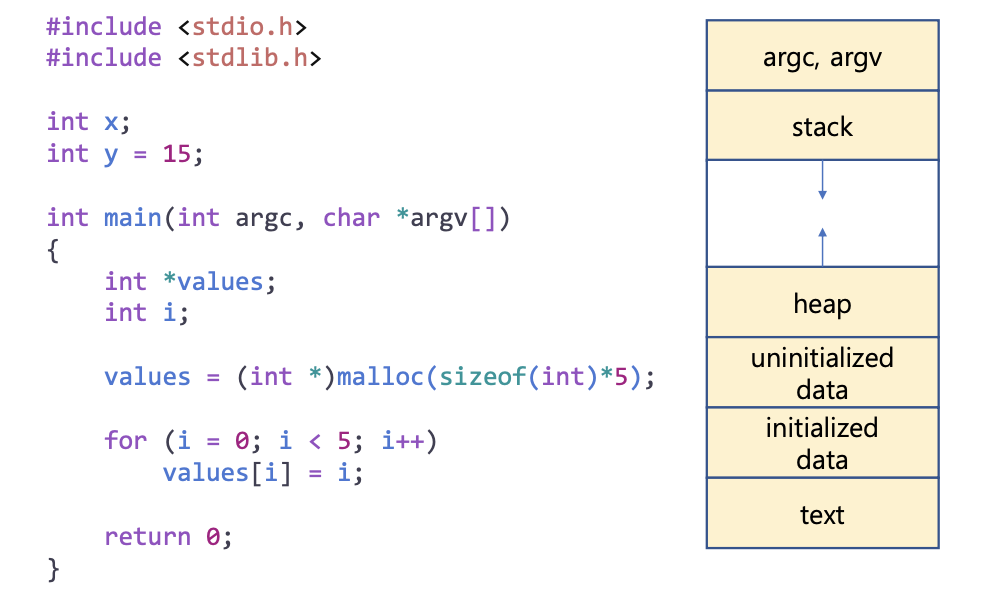

### Process 의 State
- 프로세스가 실행됨에 따라 상태가 바뀝니다.
    - _NEW_ 
        - 프로세스가 생성됨 
    - _RUNNING_ 
        - 명령어들이 실행됨 
    - _WAITING_ 
        - 프로세스가 특정 이벤트가 일어나기를 대기 
        - e.g.) I/O completion, 신호 수신 
    - _READY_ 
        - 프로세스가 프로세서에게 배정되기를 대기 
    - _TERMINATED_ 
        - 프로세스가 종료됨 

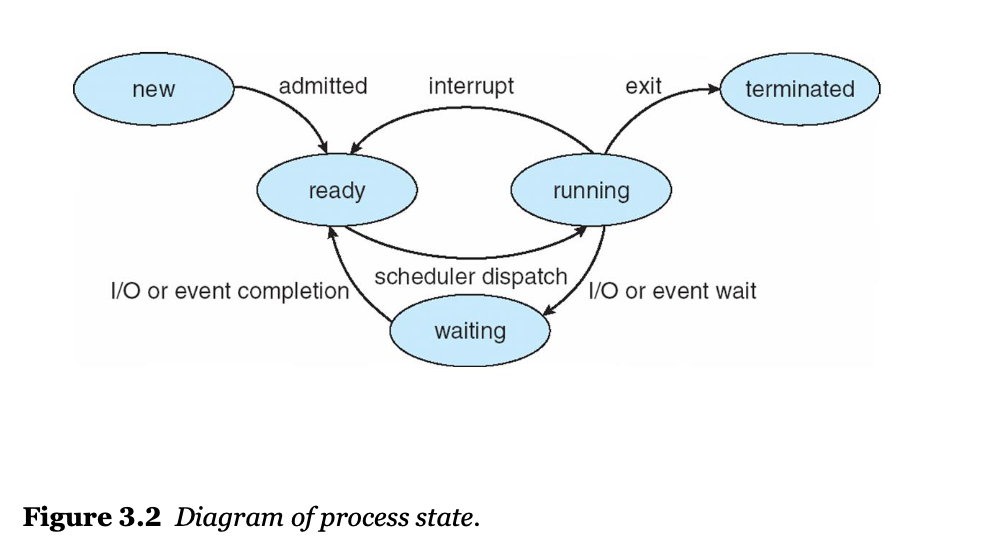

### Process 의 __PCB (Process Control Block)__ 
- TCB(Task Contorl Block) 이라고도 함
- PCB에 각각의 프로세스의 정보가 저장됨
    - __Process State__
    - __Program Counter__
        - Register
        - 다음 실행될 명령어의 주소를 저장하고 있음 
        - Process Counter를 참조하여 다음에 실행된 명령어를 Instruction Register에 올림
    - CPU Registers
        - Instruction Register
        - Data Register
    - CPU-scheduling information
    - Memory-management information
    - Account Information
    - I/O status information 
    
- what is _CONTEXT_  ?
    - Program Counter + CPU Registers
        
![Process Control Block](../images/02_3.png)

### Process - Recap
- __process__ 란 __실행 중인 프로그램__ 으로서 OS에서의 작업 단위 
- process 가 실행되기 위해서는 아래와 같은 resource 들이 필요
    - CPU
    - Memory
    - files
    - I/O device

- __process__ 는 하나 이상의 _thread_ 를 실행
- 컴퓨터 발전의 힘입어, process 의 개념이 확장
    - 프로세스는 다중 thread 실행이 가능
    - multi-threading 으로 효율성 및 병렬처리가 가능
    
- __Thread__ lightweigth process 입니다.
- __Threads__ are the unit of execution within a process
- processes are running binaries and threads are __the smallest unit of execution schedulable by an operating system’s process scheduler__

### 3.2 Process Scheduling

### Multi-programming & Time-Sharing (Multi-tasking)

- __Multi-programming 의 목적__
  - 여러 개의 프로그램을 동시에 실행하는 것
  - 낭비되는 시간동안 다른 프로세스를 수행하는 것
  - 예를 들어 프로그램 실행 도중 I/O interrupt가 발생하면, 해당 프로세스는 응답을 대기하고, 그 사이 다른 프로세스를 실행하여 CPU 활용을 늘리는 것
  - runs more than one program at a time
  - keeps several processes in memory simultaneously
  - __to increase CPU utilization__

- __Time-Sharing (Multi-tasking)의 목적__
  - multi-programming의 확장 개념
  - 다수의 task(process)를 스케줄링에 의해 번갈아 수행하는 것으로써 사용자가 __병렬적으로__ Task를 수행할 수 있게 해줌
  - multi-programming 과의 다른 점은 Multi-programming CPU 활용을 늘리다는점
  - Multi-tasking 은 스케줄러에 의해 정해진 시간동안 번갈아 가면서 Task를 처리한다는 점입니다.
  - a logical extension of multiprogramming.
  - in which CPU switches jobs so frequently that users can interact with each job while it is running
  - __CPU scheduling__
    - If several processes are ready to run at the same time, the system must choose which process will run next


### Scheduling Queues

- 실행 전 프로세스는 __ready queue__ 에 저장
    - CPU을 할당받기 위해 대기합니다.
- 특정 이벤트를 대기하는 프로세스는 __wait queue__ 에 저장
- 이러한 __scheduling queue__ 들은 __PCB__ 연결 리스트로 구현되어 있습니다. 

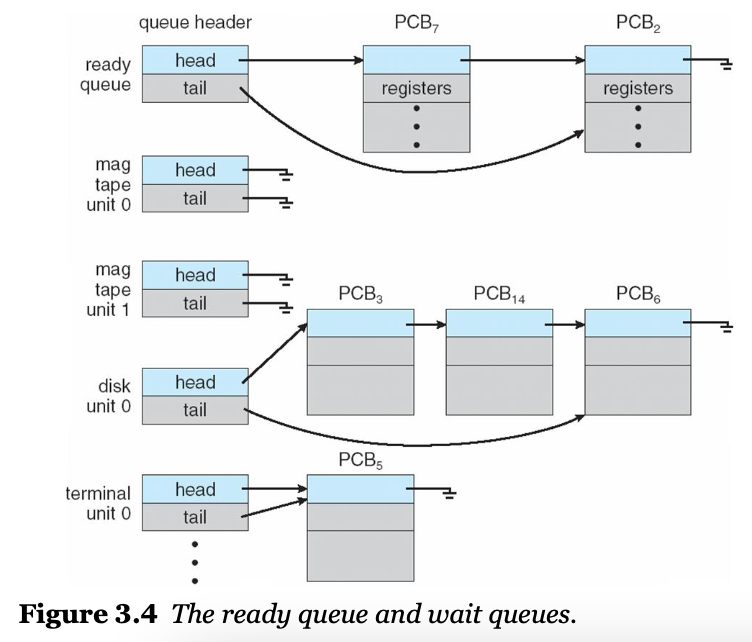

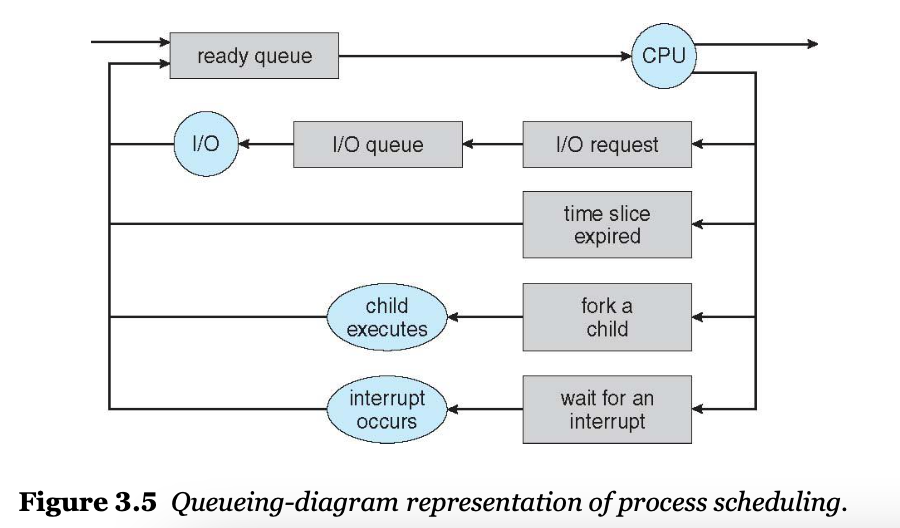

### Context Switch 
- __Context__
    - PCB 에 있는 Program Counter + CPU Registers(Instruction Register, Data Register) 정보 
- __Interrupt__ 발생시
    - 현재 실행되고 있는 프로세스의 Context 저장
    - 프로세스 재실행시 Context 복구
- __Context Switch__
    - CPU 가 다른 프로세스로 전환하는 것을 뜻
        - 현재 프로세스의 상태를 저장
        - 실행될 프로세스의 상태를 복구
    - 이 과정에서 kernel overhead가 일어나며, __multi-threading__ 개발된 이유  

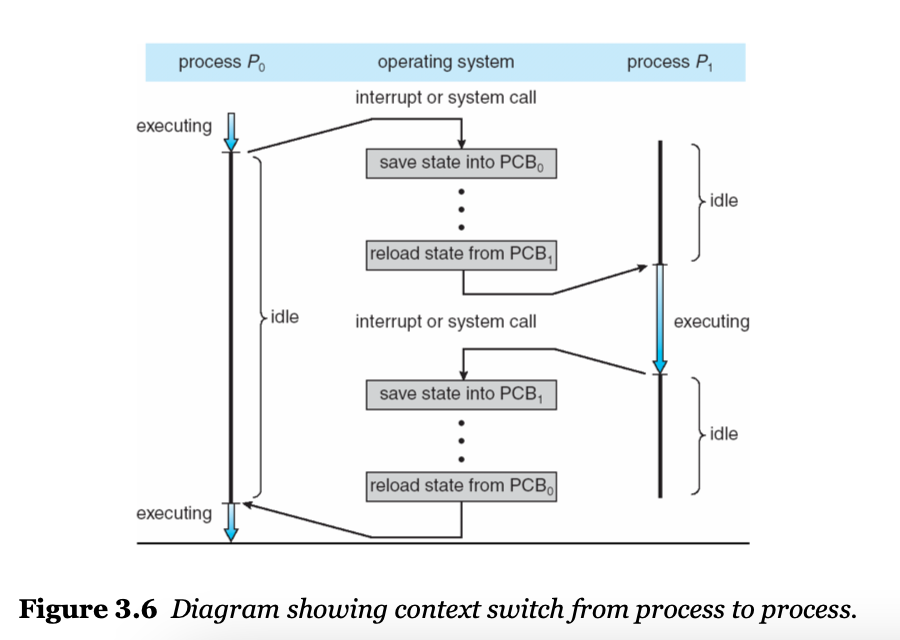

### 3.3 Operations on Processes
- OS 는 __프로세스 생성__ 과 __프로세스 종료__ 방법을 제공해야 합니다. 

### Process Creation

- __parent process__
    - 부모 프로세스로서 새로운 프로세스를 생성
- __child process__
    - 자식 프로세스로서 새롭게 생성된 프로세스 
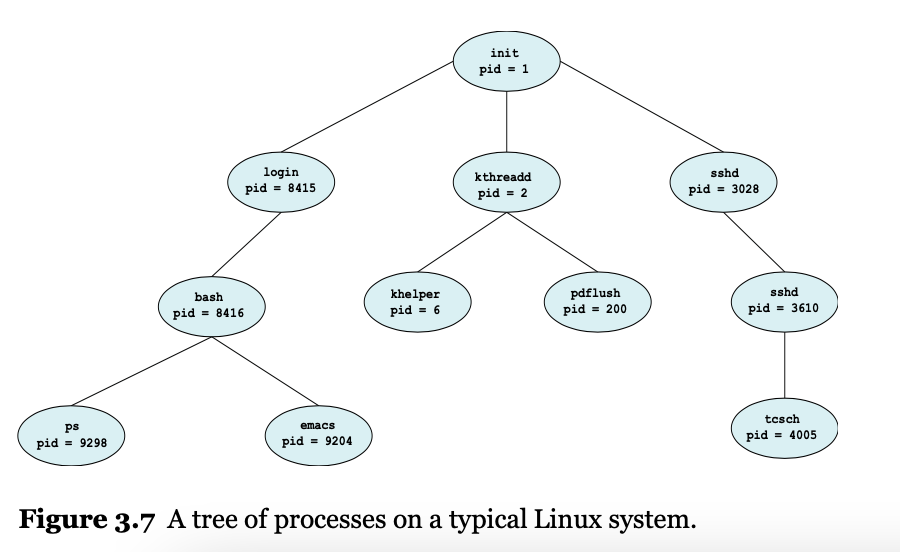

- 프로세스 생성시의 __실행방법__
    1. 부모 자식 __동시 실행__  
    2. __부모 대기__ 그리고 __자식 실행__


- 프로세스 생성시의 __주소 공간__
    1. 자식 프로세스가 부모 프로세스의 __주소 공간 복사__
    2. 자식 프로세스가 __새로운 프로그램을 실행__ -> 주소 공간


- __주소 공간(Address Space)__
    - virtual 메모리
    - 구성요소 
        - code
        - data
        - stack
        - heap

```c
#include <stdio.h>
#include <unistd.h>
#include <wait.h>
int main()  
{
    pid_t pid;
    // fork a child process
    pid = fork();
    if (pid < 0) { // error occurred
        fprintf(stderr, "Fork Failed");
        return 1;
    }
    else if (pid == 0) { // child process
        execlp("/bin/ls", "ls", NULL);
    }
    else { // parent process
        wait(NULL);
        printf("Child Complete");
    }
    return 0;
}
```

- __fork() system call__ 을 통해 부모 프로세스의 주소 공간을 복사한 자식 프로세스 생성
    - 이러한 동작방식은 부모와 자식 프로세스 간의 소통을 원활히 함
- __exec() system call__ 을 통해 부모와 자식 둘 중 하나의 (여기서는 자식) 주소 공간을 새로운 프로그램을 대체 

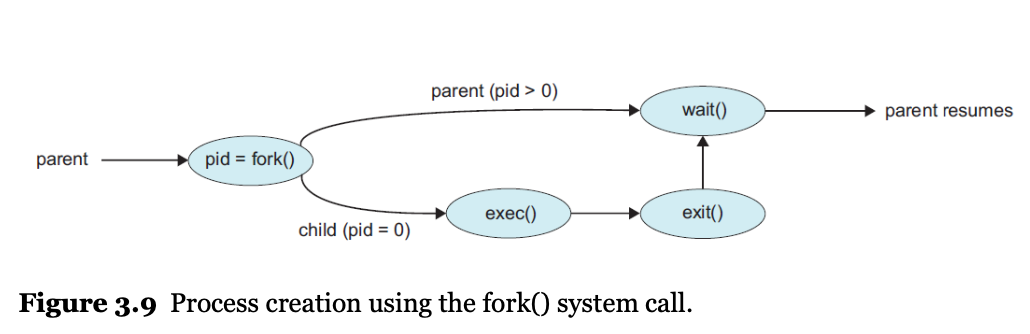

### Process Termination


- 프로세스 종료 상황
    1. 마지막 선언문 실행 
    2. exit() system call  


- OS 가 모든 자원을 회수


- __Cascading termination__
    - 부모 프로세스가 종료되면 자식 프로세스도 종료
    
    
- __Zombie__ & __Orphan__
    - __Zombie__
        - 자식 프로세스가 실행이 종료되었지만 부모 프로세스가 wait() 호출을 하지 않아 삭제되지 않은 자식 프로세스
    - __Orphan__
        - 부모 프로세스가 wait() 호출을 하지 않고 종료되어 남아있는 자식 프로세스

### 3.4 Exercises

#### Recap

- `fork()` system call 
    - 자식 프로세스가 생성 
    - 자식 프로세스는 부모의 address space 를 복사

- __자식, 부모 프로세스 모두 `fork()` 이후 명령어들을 실행__

- __하나의 차이점__
    - 자식 프로세스 일시, `fork()` 는 0 을 반환
    - 부모 프로세스 일시, `fork()` 는 0 이 아닌 값을 반환

```c
#include <stdio.h>
#include <unistd.h>
int main() {
    pid_t pid;
    pid = fork();
    printf("Hello, Process!\n");
}
```

```c
#include <stdio.h>
#include <unistd.h>
int main() {
    pid_t pid;
    pid = fork();
    printf("Hello, Process! %d\n", pid);
}
```

    
- `fork()` 이후 
    1. 부모 프로세스가 계속 실행 하거나
    2. `wait()` system call 로 자식 프로세스가 종료될까지 부모 프로세스를 read queue에 대기

#### part1)

```c
#include <stdio.h>
#include <unistd.h>
#include <wait.h>

int main() {
    pid_t pid;
    pid = fork();
    if (pid > 0)
        wait(NULL);
    printf("Hello, Process! %d\n", pid);
}
```


```c
/* 
- Exercise 3.1 (p. 154)  
- What output will be at Line A?
*/  
#include <stdio.h>
#include <unistd.h>
#include <wait.h>

int value = 5;
int main() 
{
    pid_t pid;
    pid = fork();
    if (pid == 0) { // child process
        value += 15;
        return 0;
    }
    else if (pid > 0) { // parent process
        wait(NULL);
        printf("Parent: value = %d\n", value); // LINE A
    }
}
```
- Answer : 5 
- 자식 프로세스 복사 해당 프로세스는 독립적이므로, 부모 프로세스에 영향 X


```c
/* 
- Exercise 3.2 (p. 154)
- How many processes are created?
*/  
#include <stdio.h>
#include <unistd.h>
#include <wait.h>
/*
* How many processes are created? */
int main() 
{
    fork(); // fork a child process
    fork(); // fork another child process
    fork(); // and fork another
    return 0;
}
```
- Answer : 8개 ($2^{3}$)  
- 1번째 fork
    - P0 -> P1
- 2번째 fork 
    - P0 -> P2
    - P1 -> P3
- 3번째 fork 
    - P0 -> P4
    - P1 -> P5
    - P2 -> P6
    - P3 -> P7
    
```c
/* 
Exercise 3.11 (p. 905)
How many processes are created?
*/  

#include <stdio.h>
#include <unistd.h>

int main() {
    int i;
    
    for (i = 0; i < 4; i++)
        fork();
    
    return 0;
}
```
- Answer : 16개 ($2^{4}$)  
- 위오 같은 논리

#### part2)

```c
/* 
Exercise 3.12 (p. 905)
When will LINE J be reached?
*/  

#include <stdio.h>
#include <unistd.h>
#include <wait.h>

int main() 
{
    pid_t pid;
    pid = fork();
    if (pid == 0) { // child process 
        execlp("/bin/ls", "ls", NULL); 
        printf("LINE J\n");
    }
    else if (pid > 0) { // parent process
        wait(NULL);
        printf("Child Complete\n");
    }
    return 0;
}
```
- Answer :  Never 
- execlp 는 자식 프로세스가 새로운 프로그램을 실행합니다. 주소 공간이 덮여씌여집니다. 
  
```c
/* 
Exercise 3.13 (p. 905)
What are the pid values?
*/  

#include <stdio.h>
#include <unistd.h>
#include <wait.h>

int main() 
{
    pid_t pid, pid1;
    pid = fork();
    if (pid == 0) { // child process
        pid1 = getpid();
        printf("child: pid = %d\n", pid); // A
        printf("child: pid1 = %d\n", pid1); // B
    }
    else if (pid > 0) { // parent process
        pid1 = getpid();
        printf("parent: pid = %d\n", pid);   // C
        printf("parent: pid1 = %d\n", pid1); // D
        wait(NULL);
    }
    return 0;
}
```
- get_pid : returns __the process ID of the calling process.__
- fork()
    - returns __a value of 0 to the child process__
    - returns __the process ID of the child process to the parent process.__
    - returns __a value of -1 is returned to the parent process, no child process is created__
- Answer(Example)
    - parent: 5157 (pid of child process)
    - parent: 5156 (pid of parent process)
    - child: 0 
    - child: 5157 (pid of child process itself )
    
    
```c
/* 
Exercise 3.16 (p. 905)
What output will be at Line X and Line Y?
*/  

#include <stdio.h>
#include <unistd.h>
#include <wait.h>

#define SIZE 5
int nums[SIZE] = {0, 1, 2, 3, 4};

int main() 
{
    pid_t pid;
    int i;
    pid = fork();
    
    if (pid == 0) { // child process
        for (i = 0; i< SIZE; i++){
            nums[i] *= i;
            printf("CHILD: %d \n", nums[i]); // LINE X
        }
    }
    else if (pid > 0) { // parent process
        wait(NULL);
        for (i = 0; i< SIZE; i++){
            printf("PARENT: %d \n", nums[i]); // LINE Y
        }
    }
    return 0;
}
```
- Answer(Example)
    - CHILD: 0 1 4 9 16
    - PARNET : 0 1 2 3 4
- 자식과 부모 프로세스의 변수들은 독립적입니다. 

### 3.5 Fork Function
- Reference : https://www.csl.mtu.edu/cs4411.ck/www/NOTES/process/fork/create.html
- 꼭 읽어보길 권장 -> 읽으면 공룡문제 다품

- System call fork() is used to create processes. 
    - It takes no arguments and returns a process ID. 
    - The purpose of fork() is to create a new process, which becomes the child process of the caller. 
    - After a new child process is created, both processes will execute the next instruction following the fork() system call. 
    - Therefore, we have to distinguish the parent from the child. 
    - This can be done by testing the returned value of fork():

    1. __If fork() returns a negative value, the creation of a child process was unsuccessful.__
    2. __fork() returns a zero to the newly created child process__  
    3. __fork() returns a positive value, the process ID of the child process, to the parent__
        - The returned process ID is of type pid_t defined in sys/types.h. 
        - Normally, the process ID is an integer. Moreover, a process can use function getpid() to retrieve the process ID assigned to this process.

    - Therefore, after the system call to fork(), a simple test can tell which process is the child. 
    - Please note that Unix will make an exact copy of the parent's address space and give it to the child. Therefore, the parent and child processes have separate address spaces.

### 3.6 Online Quiz

#### Q1

```c
/* 
실행 순서
*/  

#include <stdio.h>
#include <unistd.h>
#include <wait.h>

int main() {
    pid_t pid = fork();
    
    if (pid > 0){
        wait(NULL);
        printf("A ");
        // LINE A
    } else {
        pid = fork()
        if (pid == 0){
            printf("B ");
            //LINE B
        } else
        {
            wait(NULL);
            printf("C ");
            //LINE C
        }
    }
     printf("D ");
    // LINE D
}
```

- ANSWER : 'B' 'D' 'C' 'D' 'A' 'D'
    - 첫번째 포크 
        - 부모 자식 -> 부모 는 wait-queue
    - 자식1 프로세스에서 두번째 포크
        - 자식 손자 -> 자식 은 wait-queue
        - 손자는 'B' 'D'
    - 손자가 끝났으므로 자식 프로세스 시작 
        - 자식은 'C' 'D'
    - 자식이 끝났으므로 부모 프로세스 시작
        - 부모는 'A' 'D'
- mult-tasking 으로 인해 context switch가 일어나면 순서가 바뀔 가능성도 있음



#### Q2

```c
/* 
x 출력 값은?
*/  

#include <stdio.h>
#include <unistd.h>
#include <wait.h>

int x = 10;

int main() {
    pid_t pid = fork();
    
    if (pid == 0){
        x += 10; 
    } else {
        wait(NULL);
        pid = fork()
        x += 10;
        if (pid > 0) {
            wait(NULL)
        } else {
            x += 10;
        }
    }
    printf("%d ", x);
}
```

- ANSWER : 20 30 20
    - 첫번째 포크 
        - 부모 자식 -> 부모 는 wait-queue
    - 자식 
        - X = 20 
        - 20 출력 
    - 자식이 끝났으므로 부모 프로세스 시작
        - X = 10
        - 두번째 포크 
            - 포크 이후 X = 20 
            - 부모 자식 2 -> 부모는 wait-queue
        - 자식 2
            - X = 30
            - 30 출력  
            
    - 자식2 이 끝났으므로 부모 프로세스 시작   
         - X = 20
         - 20 출력 